In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

import warnings

# Ignorieren von FutureWarnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/data_for_test.csv
/kaggle/input/dataset/data_for_training.csv


# 1. Business Understanding [ÜBERARBEITEN, AI GENERATED!!!!!!!!!]

**„Wir brauchen eine Vorhersage des Verkaufspreises (`Z_Verkaufspreis`)“**

Dieses zentrale Anliegen bildet den Ausgangspunkt unserer Analyse im Rahmen des CRISP-DM Prozessmodells. Das primäre Business Goal besteht darin, für mittelfristig orientierte Investoren (Anlagehorizont 1–2 Jahre) Entscheidungsgrundlagen zu schaffen, die eine Gewinnmaximierung durch Kapitalwertsteigerung ermöglichen. In diesem kurzen Zeithorizont ist nicht der Cashflow durch Vermietung der primäre Renditetreiber, sondern die Differenz zwischen Einkaufspreis und potentiellem Wiederverkaufswert.

Für den Investor ist es essenziell, Marktineffizienzen zu identifizieren. Das bedeutet konkret: Wir müssen Immobilien finden, deren aktueller Angebotspreis *unter* ihrem fairen, theoretischen Marktwert liegt (Unterbewertung). Eine präzise Vorhersage des `Z_Verkaufspreis` fungiert hierbei als objektiver Benchmark.

Daraus leitet sich das **Data Mining Goal** ab:
Es gilt, ein überwachtes Regressionsmodell auf Basis der Datei `data_for_training.csv` zu entwickeln, das den Zielwert `Z_Verkaufspreis` anhand der gegebenen Merkmale so genau wie möglich approximiert. Das Modell muss in der Lage sein, auf ungesehenen Daten (`data_for_test.csv`) robust zu generalisieren, um Fehlinvestitionen durch Überbewertung zu vermeiden. Ein erfolgreiches Modell ermöglicht es dem Investor, gezielt Objekte zu filtern, bei denen die Modellvorhersage signifikant über dem aktuellen Listenpreis liegt.

# 2. Data Exploration und Analyse

In [3]:
# Daten Einlesen
data_train = pd.read_csv('/kaggle/input/dataset/data_for_training.csv', sep=';')

# Erste 10 Datensätze ausgeben
data_train.head(10)

,A_Index,Ausbaustufe,Baujahr,Besonderheiten,EG_qm,Gesamtqual,Gesamtzustand,Grundstueck_qm,Kellerhoehe,Lage,QualInnenfarbe,Steigung,Umgebaut,Verkaufsjahr,Wohnflaeche_qm,Z_Verkaufspreis
0,1710,1 Ebene,1960,NaN,166,Durchschnitt,Durchschnitt,1428,Durchschnitt,NeuBerlin_B,3,Keine/Kaum,1960,2009,166,100088
1,1310,1 Ebene,1982,NaN,151,Durchschnitt,Durchschnitt,2365,Gut,NeuBerlin_B,2,Mittel,1982,2006,151,145148
2,2563,1 Ebene,1925,NaN,84,Schlecht,Schlecht,1004,Schlecht,NeuBerlin_A,3,Stark,1953,2011,84,48860
3,373,1 Ebene,1968,NaN,95,Durchschnitt,Durchschnitt,1314,Durchschnitt,NeuBerlin_C,5,Keine/Kaum,1968,2006,95,72349
4,1464,1 Ebene,1979,NaN,133,Gut,Gut,1080,Gut,NeuBerlin_C,5,Keine/Kaum,2007,2007,133,138313
5,776,"1,5 Ebenen",1951,NaN,114,Durchschnitt,Durchschnitt,962,Durchschnitt,NeuBerlin_C,2,Keine/Kaum,1953,2005,155,76230
6,1874,1 Ebene,1954,NaN,124,Durchschnitt,Durchschnitt,931,Schlecht,NeuBerlin_A,4,Keine/Kaum,1954,2008,124,84066
7,65,2 Ebenen,2003,NaN,70,Gut,Durchschnitt,217,Gut,NeuBerlin_A,1,Keine/Kaum,2003,2007,140,106907
8,2289,1 Ebene,1999,NaN,102,Durchschnitt,Durchschnitt,1660,Gut,NeuBerlin_B,2,Mittel,1999,2007,102,93837
9,2390,1 Ebene,1977,Pool,200,Gut,Schlecht,1440,Gut,NeuBerlin_C,2,Keine/Kaum,1977,2006,246,155623


Spalten: A_Index, Ausbaustufe, Baujahr, Besonderheiten, EG_qm, Gesamtqual, Gesamtzustand, Grundstueck_qm, Kellerhoehe, Lage, QualInnenfarbe, Steigung, Umgebaut, Verkaufsjahr, Wohnflaeche_qm, Z_Verkaufspreis

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


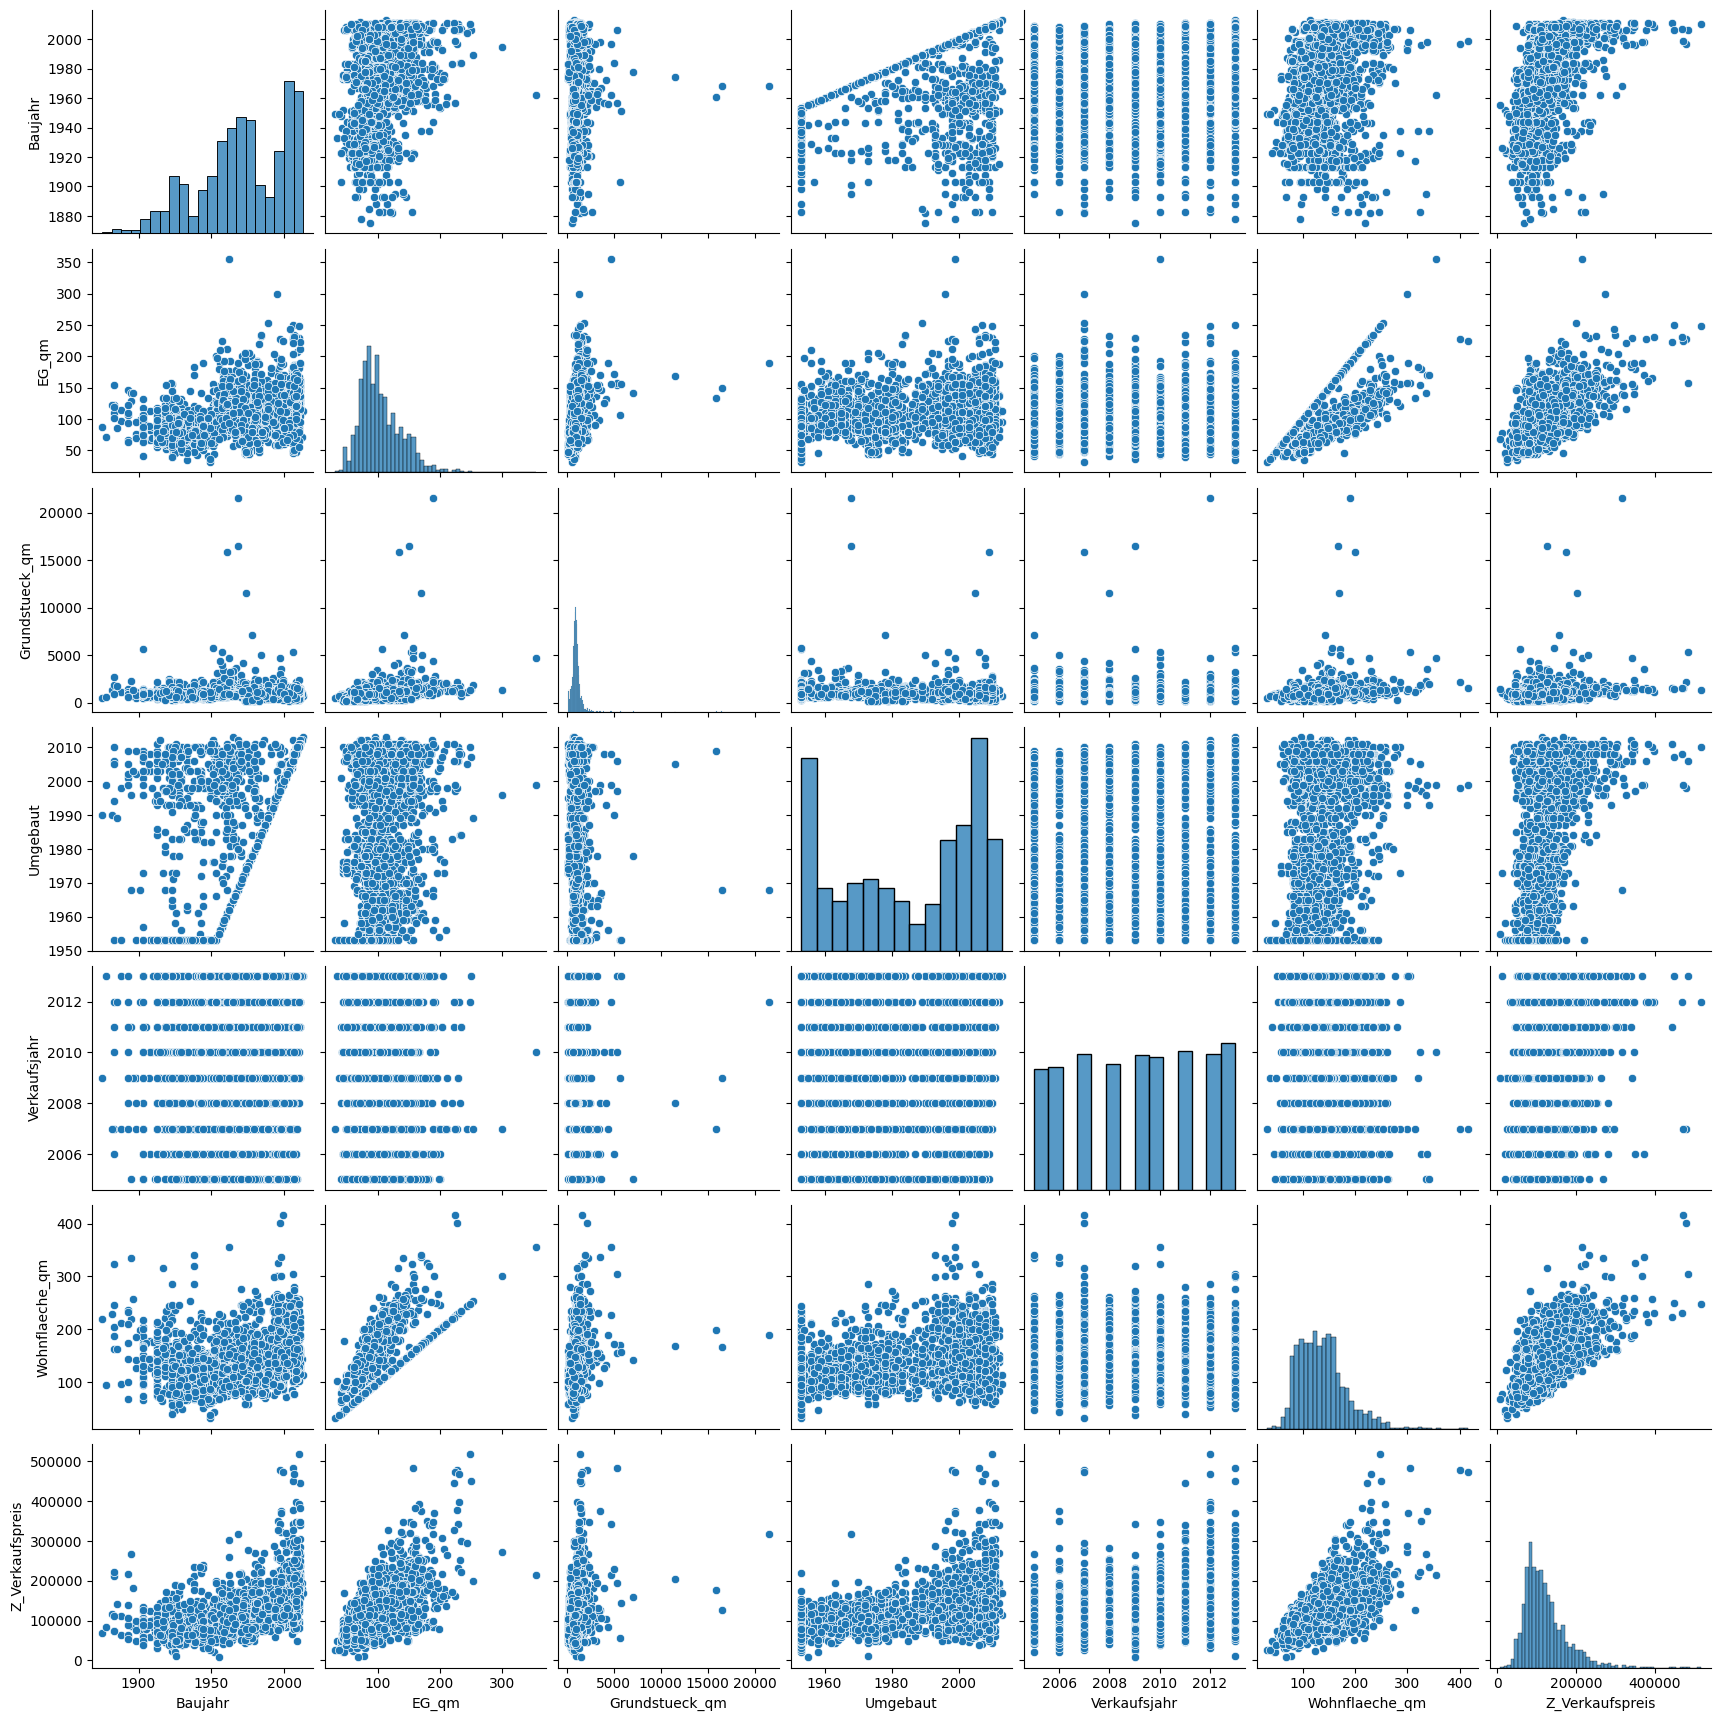

In [5]:
# Wähle gezielte numerische Spalten
special = ['Baujahr', 'EG_qm', 'Grundstueck_qm', 'Umgebaut', 'Wohnflaeche_qm', 'Z_Verkaufspreis']

# Scatterplot erstellen
scatterplot = sns.pairplot(data_train[special])
scatterplot

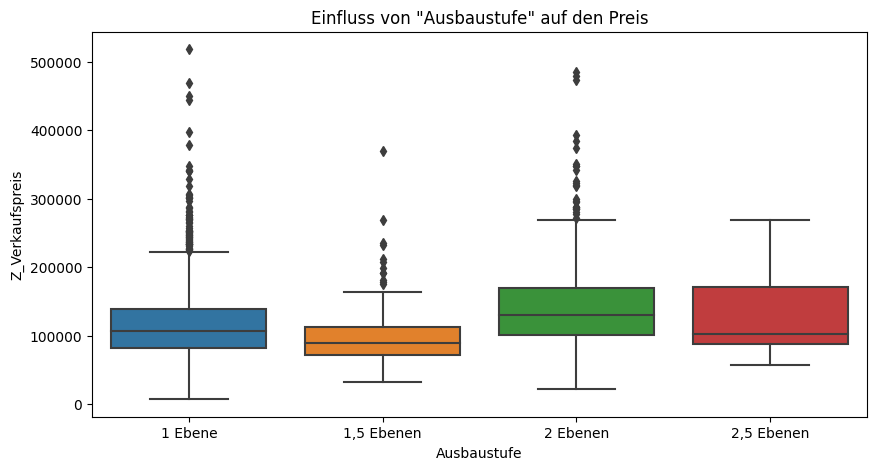

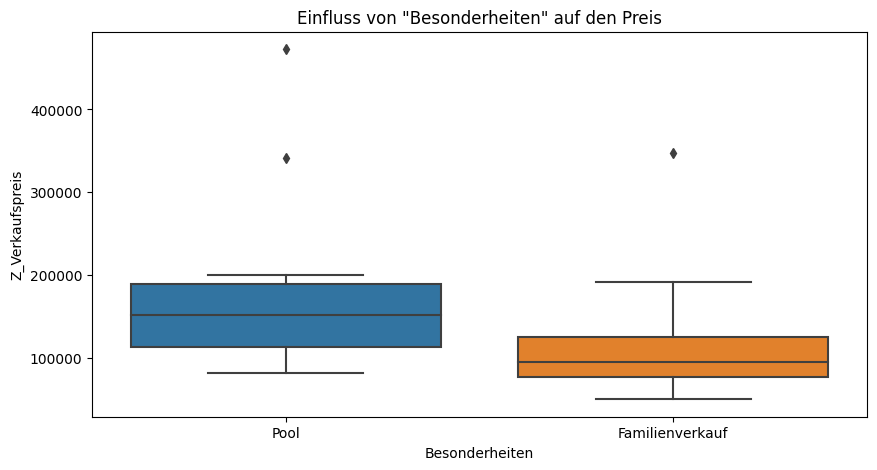

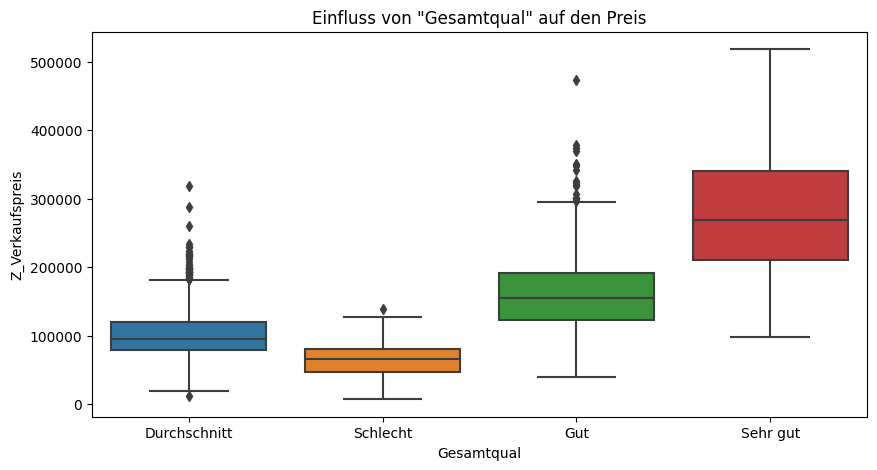

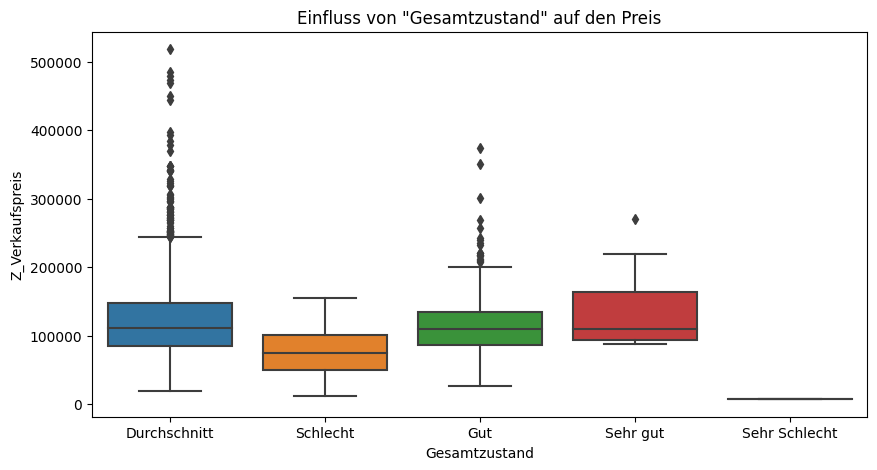

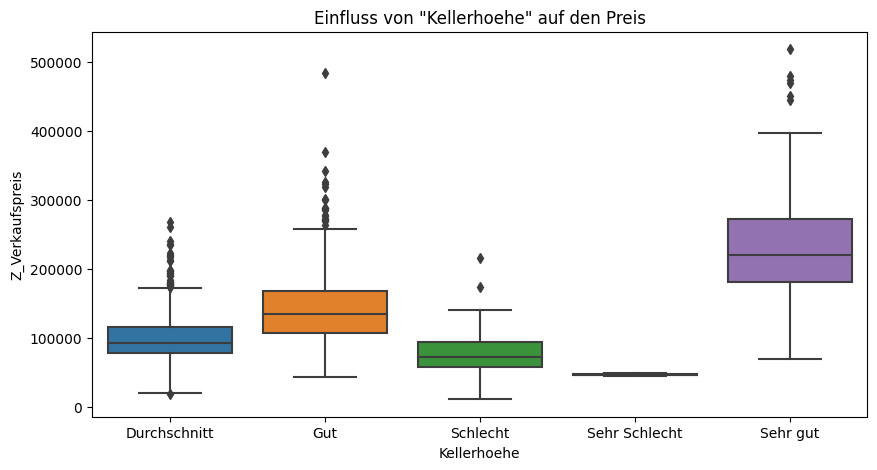

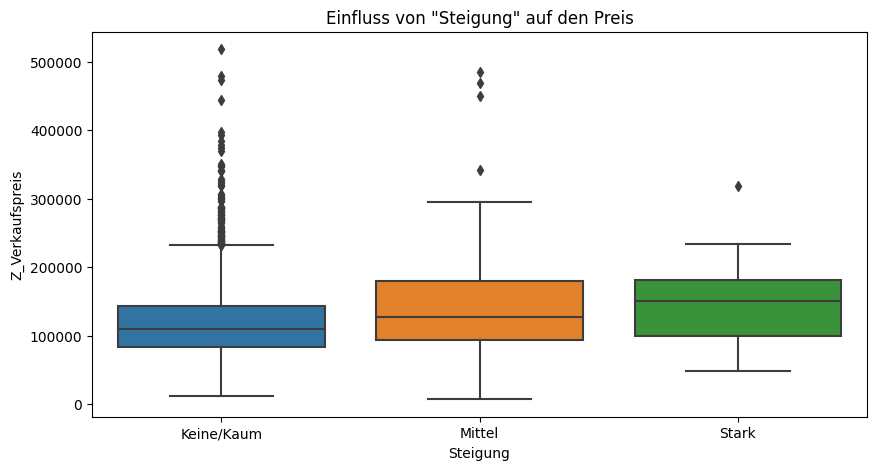

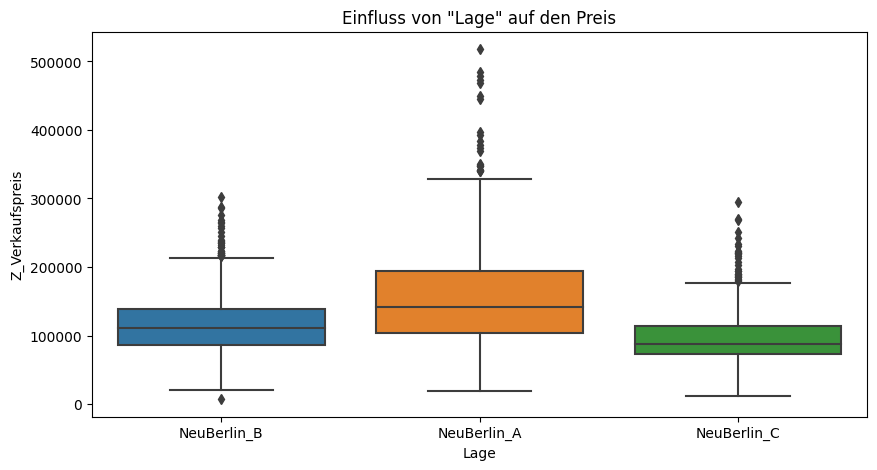

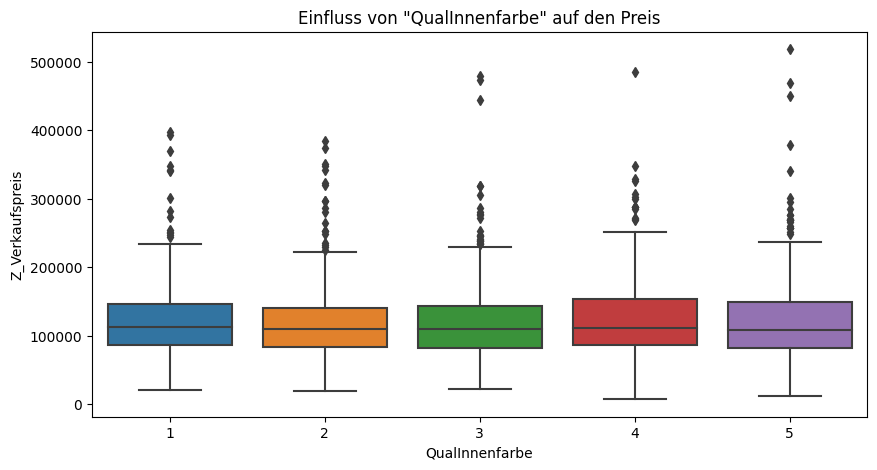

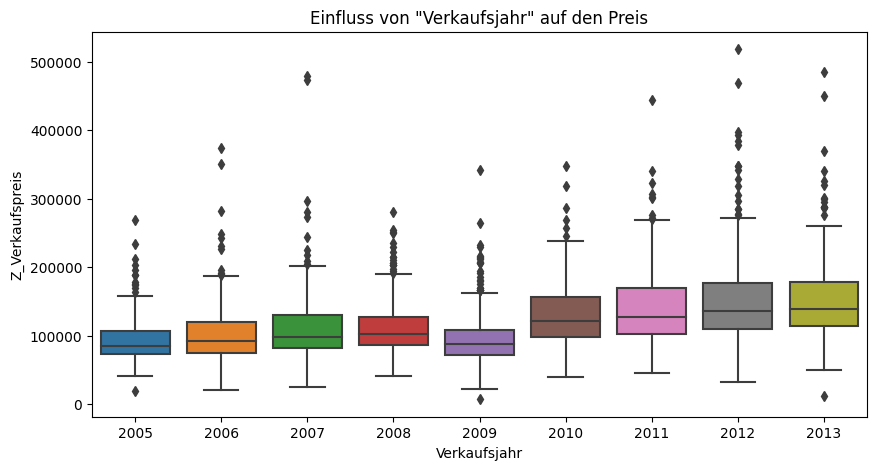

In [4]:
# Wähle kategorische Spalten
categorical = ['Ausbaustufe', 'Besonderheiten', 'Gesamtqual', 'Gesamtzustand', 'Kellerhoehe', 'Steigung', 'Lage', 'QualInnenfarbe', 'Verkaufsjahr']

# Für jede Kategorie einen Plot machen
for column in categorical:
    plt.figure(figsize=(10, 5))
    # Sortierung hilft beim Lesen (optional)
    sns.boxplot(x=column, y='Z_Verkaufspreis', data=data_train)
    plt.title(f'Einfluss von "{column}" auf den Preis')
    plt.show()

Basierend auf den ersten allgemeinen Plots lassen sich folgende Hypothesen und folgende Handlungen ableiten:

**1. Numerische Zusammenhänge (Scatterplots):**
- **Preistreiber:** Es ist eine positive Korrelation zwischen `Wohnflaeche_qm` und dem `Z_Verkaufspreis` erkennbar. Die Beziehung wirkt weitgehend linear, zeigt aber bei sehr großen Flächen eine zunehmende Varianz
    - Ähnlich dazu scheint `EG_qm` aus den selben gründen positiv mit dem Verkaufspreis korreliert zu sein 
- **Ausreißer:** Das Feature `Grundstueck_qm` zeigt massive Ausreißer (einzelne Punkte weit rechts bei 20.000qm, jedoch Großteil der Daten < 2.000qm). Diese Ausreißer stauchen die Skala und erschweren das Lernen für lineare Modelle
    - [ ] Diese Ausreißer sind zu entfernen
- **Alter und Preis:** Neuere Häuser (`Baujahr`) haben eher höhere Preise, die Streuung ist jedoch groß. Vermutbar ist, dass das Baujahr allein nicht reicht und der Renovierungszustand (`Gesamtzustand`) ebenfalls eine Rolle spielt
    - [ ] Dieser Zusammenhang ist zu überprüfen
 - **Ohne/Wenig Einfluss:** `Umgebaut` 

**2. Kategorische Einflüsse (Boxplots):**
- **Qualität:** Der Boxplot zu `Gesamtqual` zeigt, dass die Gesamtqualität der Immobilie einen Unterschied macht. Je besser die Qualität, umso höher ist der Median-Preis. Die Boxen überlappen sich zudem kaum, was bedeutet, dass dieses Merkmal eine hohe Trennschärfe besitzt
- **Steigung:** Häuser mit "Starker" `Steigung` haben einen etwas höheren Median als flache Grundstücke. Dies könnte mit einer besseren Aussicht (Hanglage) korrelieren
-  **Lage:** Geringer Einfluss
- **Besonderheiten:** Der Plot zu `Besonderheiten` zeigt nur "Pool" und "Familienverkauf". Ein Blick in die Rohdaten zeigt viele `NaN`-Werte
    - *Interpretation:* `NaN` bedeutet wahrscheinlich, dass eine Immobilie keine Besonderheit hat
    - [ ] Im Feature Engineering sollten diese Zeilen nicht gelöscht werden, stattdessen sollten die `NaN`-Werte durch eine Kategorie wie "Standard" ersetzt werden
    - Ein Pool scheint den Preis signifikant zu heben, erkennbar durch den höheren Median
- **Kellerhöhe:** Häuser mit größerer Kellerhöhe scheinen stark mit dem Preis korreliert zu sein
- **Verkaufsjahr:** Geringe Tendenz, dass später verkaufte Häuser auch teurer verkauft wurden
    - Interpretation: Marktwert von Immobilien könnte steigen
- **Ohne/Wenig Einfluss:** Keinen besonders nennenswerten Einfluss auf den Preis haben die Kategorien `Ausbaustufe`, `QualInnenfarbe`